In [91]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [92]:
#baca file
dy = pd.read_csv("pilkada-100-uas.csv")
df = pd.read_csv("pilkada-1000-uas.csv")

In [93]:
#melihat file
df

,Hasil Pilkada,Jumlah Paslon,Nama Daerah,Jalur Pencalonan,Nama Kandidat (1),Nama Kandidat (2),Gender (1),Gender (2),Usia (1),Usia (2),Latar Belakang Profesi (1),Latar Belakang Profesi (2),Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,Kalah,3,Provinsi Bengkulu,PARPOL,Helmi Hasan,Muslihan DS,L,L,41,74,SIPIL,SIPIL,0,0,3,0.250,0.179,0.222
1,Menang,3,Provinsi Bengkulu,PARPOL,Rohidin Mersyah,Rosjonsyah Syahili,L,L,50,56,SIPIL,SIPIL,1,0,6,0.500,0.584,0.511
2,Kalah,3,Provinsi Bengkulu,PARPOL,Agusrin Maryono Najamuddin,Imron Rosyadi,L,L,51,59,SIPIL,SIPIL,0,0,2,0.167,0.237,0.222
3,Kalah,3,Provinsi Jambi,PARPOL,Cek Endra,Ratu Munawaroh,L,P,62,43,SIPIL,SIPIL,0,0,4,0.333,0.473,0.327
4,Kalah,3,Provinsi Jambi,PARPOL,Fachrori Umar,Syafril Nursal,L,L,68,58,SIPIL,TNI/POLRI,1,0,4,0.333,0.263,0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Kalah,4,KOTA MOJOKERTO (JAWA TIMUR),PARPOL,WARSITO,MOELJADI,L,L,49,46,SIPIL,SIPIL,0,0,2,0.167,0.157,0.240
996,Menang,4,KOTA MOJOKERTO (JAWA TIMUR),PARPOL,"HJ. IKA PUSPITASARI, SE",ACHMAD RIZAL ZAKARIA,P,L,39,55,SIPIL,SIPIL,0,0,2,0.167,0.293,0.240
997,Menang,3,KOTA MADIUN (JAWA TIMUR),PARPOL,"DRS. H. MAIDI, SH, MM, M.PD","INDA RAYA AYU MIKO SAPUTRI, S.E., MIB",L,P,57,37,SIPIL,SIPIL,0,0,5,0.417,0.543,0.667
998,Kalah,3,KOTA MADIUN (JAWA TIMUR),PERORANGAN,DR. HARRYADIN MAHARDIKA,"ARIEF RAHMAN, S.T., M.M.",L,L,38,42,SIPIL,SIPIL,0,0,0,0.000,0.000,0.000


In [94]:
#ubah data non-numerik menjadi numerik
le = LabelEncoder()

df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
df['Jalur Pencalonan'] = le.fit_transform(df['Jalur Pencalonan'])
df['Nama Kandidat (1)'] = le.fit_transform(df['Nama Kandidat (1)'])
df['Nama Kandidat (2)'] = le.fit_transform(df['Nama Kandidat (2)'])
df['Gender (1)'] = le.fit_transform(df['Gender (1)'])
df['Gender (2)'] = le.fit_transform(df['Gender (2)'])
df['Latar Belakang Profesi (1)'] = le.fit_transform(df['Latar Belakang Profesi (1)'])
df['Latar Belakang Profesi (2)'] = le.fit_transform(df['Latar Belakang Profesi (2)'])
df['Hasil Pilkada'] = le.fit_transform(df['Hasil Pilkada'])

dy['Nama Daerah'] = le.fit_transform(dy['Nama Daerah'])
dy['Jalur Pencalonan'] = le.fit_transform(dy['Jalur Pencalonan'])
dy['Nama Kandidat (1)'] = le.fit_transform(dy['Nama Kandidat (1)'])
dy['Nama Kandidat (2)'] = le.fit_transform(dy['Nama Kandidat (2)'])
dy['Gender (1)'] = le.fit_transform(dy['Gender (1)'])
dy['Gender (2)'] = le.fit_transform(dy['Gender (2)'])
dy['Latar Belakang Profesi (1)'] = le.fit_transform(dy['Latar Belakang Profesi (1)'])
dy['Latar Belakang Profesi (2)'] = le.fit_transform(dy['Latar Belakang Profesi (2)'])
dy['Hasil Pilkada'] = le.fit_transform(dy['Hasil Pilkada'])

#lihat data
df

,Hasil Pilkada,Jumlah Paslon,Nama Daerah,Jalur Pencalonan,Nama Kandidat (1),Nama Kandidat (2),Gender (1),Gender (2),Usia (1),Usia (2),Latar Belakang Profesi (1),Latar Belakang Profesi (2),Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,0,3,255,0,470,679,0,0,41,74,0,0,0,0,3,0.250,0.179,0.222
1,1,3,255,0,808,772,0,0,50,56,0,0,1,0,6,0.500,0.584,0.511
2,0,3,255,0,54,502,0,0,51,59,0,0,0,0,2,0.167,0.237,0.222
3,0,3,256,0,165,748,0,1,62,43,0,0,0,0,4,0.333,0.473,0.327
4,0,3,256,0,322,870,0,0,68,58,0,1,1,0,4,0.333,0.263,0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,106,0,946,599,0,0,49,46,0,0,0,0,2,0.167,0.157,0.240
996,1,4,106,0,444,3,1,0,39,55,0,0,0,0,2,0.167,0.293,0.240
997,1,3,104,0,235,459,0,1,57,37,0,0,0,0,5,0.417,0.543,0.667
998,0,3,104,1,203,7,0,0,38,42,0,0,0,0,0,0.000,0.000,0.000


In [95]:
#lihat  korelasi untuk memutuskan data yang tidak berguna
for kolom in df.columns:
    if kolom != 'Hasil Pilkada':
        korelasi = df['Hasil Pilkada'].corr(df[kolom])
        print(f"korelasi Kolom 'Hasil Pilkada' dengan kolom '{kolom}': {korelasi}")

korelasi Kolom 'Hasil Pilkada' dengan kolom 'Jumlah Paslon': -0.2742461715119374
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Nama Daerah': 0.026153194647965405
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Jalur Pencalonan': -0.18936229423737239
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Nama Kandidat (1)': -0.02546121448463993
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Nama Kandidat (2)': 0.028158301035641042
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Gender (1)': 0.004990688066858539
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Gender (2)': -0.006307447451137914
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Usia (1)': -0.12613570190480275
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Usia (2)': 0.007089175417954395
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Latar Belakang Profesi (1)': -0.004535272792787963
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Latar Belakang Profesi (2)': -0.017714411222370628
korelasi Kolom 'Hasil Pilkada' dengan kolom 'Petahana? (1)': 0.12120025201783

In [96]:
#lewati data yang korelasinya jelek berdasarkan penelusuran data pilkada 1000
df = df.drop(['Jumlah Paslon'], axis=1)
df = df.drop(['Jalur Pencalonan'], axis=1)
df = df.drop(['Nama Kandidat (1)', 'Nama Kandidat (2)'], axis=1)
df = df.drop(['Gender (1)', 'Gender (2)'], axis=1)
df = df.drop(['Usia (1)', 'Usia (2)'], axis=1)
df = df.drop(['Latar Belakang Profesi (1)', 'Latar Belakang Profesi (2)'], axis=1)

dy = dy.drop(['Jumlah Paslon'], axis=1)
dy = dy.drop(['Jalur Pencalonan'], axis=1)
dy = dy.drop(['Nama Kandidat (1)', 'Nama Kandidat (2)'], axis=1)
dy = dy.drop(['Gender (1)', 'Gender (2)'], axis=1)
dy = dy.drop(['Usia (1)', 'Usia (2)'], axis=1)
dy = dy.drop(['Latar Belakang Profesi (1)', 'Latar Belakang Profesi (2)'], axis=1)

#lihat data
df

,Hasil Pilkada,Nama Daerah,Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,0,255,0,0,3,0.250,0.179,0.222
1,1,255,1,0,6,0.500,0.584,0.511
2,0,255,0,0,2,0.167,0.237,0.222
3,0,256,0,0,4,0.333,0.473,0.327
4,0,256,1,0,4,0.333,0.263,0.345
...,...,...,...,...,...,...,...,...
995,0,106,0,0,2,0.167,0.157,0.240
996,1,106,0,0,2,0.167,0.293,0.240
997,1,104,0,0,5,0.417,0.543,0.667
998,0,104,0,0,0,0.000,0.000,0.000


In [97]:
#memastikan data sebelum diproses
#menangani str pada file 1000 data
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

#menangani str pada file 100 data
for col in dy.columns:
    if dy[col].dtype == "object":
        dy[col] = LabelEncoder().fit_transform(dy[col])

In [98]:
#melihat tipe data sebelum training (memastikan)
df.dtypes

Hasil Pilkada                      int32
Nama Daerah                        int32
Petahana? (1)                      int64
Petahana? (2)                      int64
Jumlah PARPOL Pendukung            int64
Persentase PARPOL Pendukung      float64
Jumlah Kursi Pendukung (DPR)     float64
Jumlah Kursi Pendukung (DPRD)    float64
dtype: object

In [99]:
#training
X_train_1000, X_test_1000, y_train_1000, y_test_1000 = train_test_split(df.drop("Hasil Pilkada", axis=1), df["Hasil Pilkada"], test_size=0.2)

model = DecisionTreeClassifier(max_depth=3, criterion="entropy")
model.fit(X_train_1000, y_train_1000)

#cek akurasi training
prediksi = model.predict(X_test_1000)
akurasi = np.mean(prediksi == y_test_1000)
print("peforma training 1000 data:", akurasi)

peforma training 1000 data: 0.685


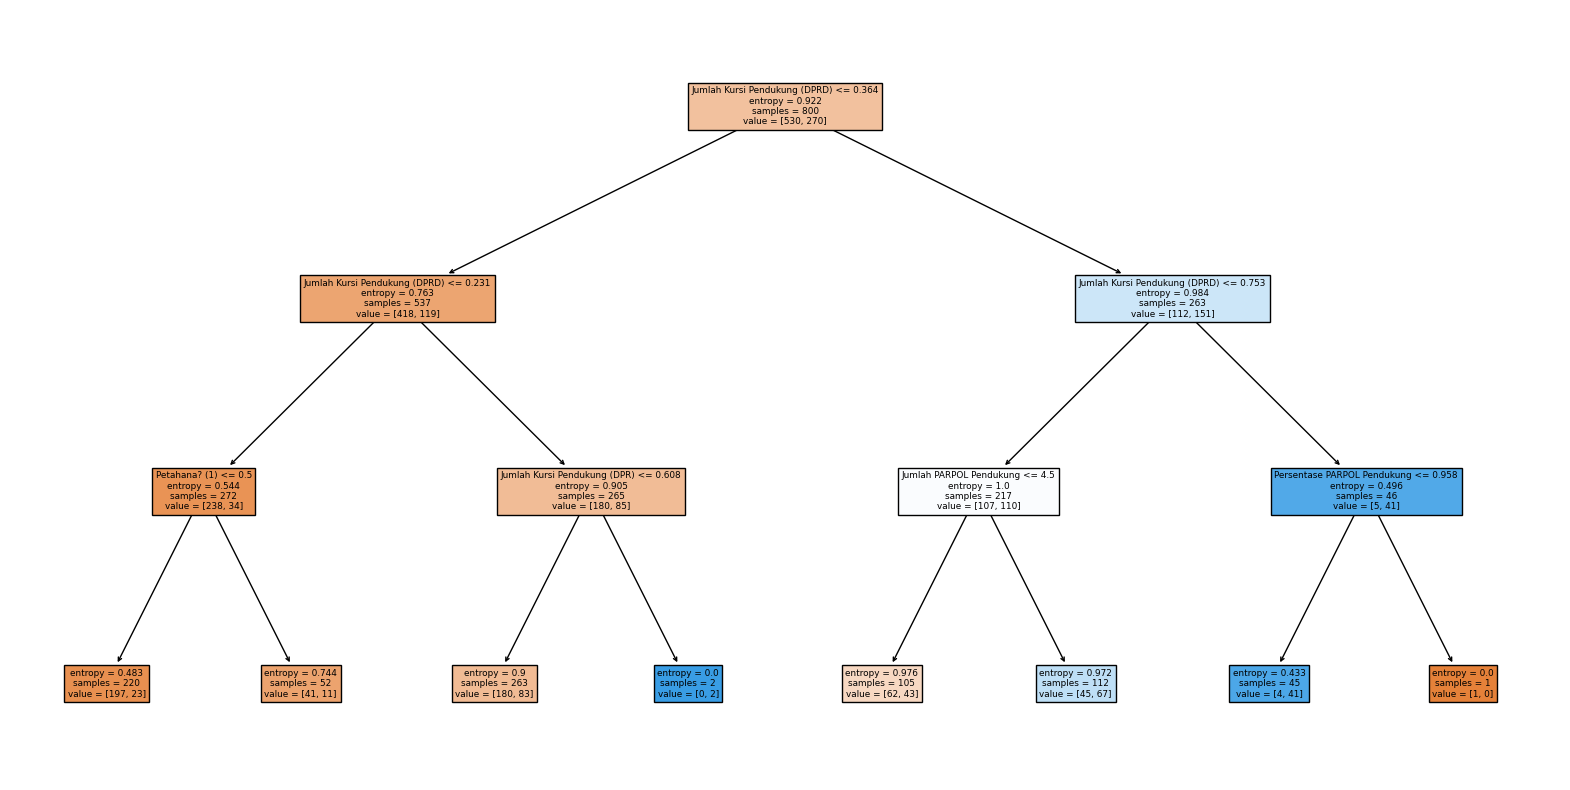

Akurasi hasil: 0.7


In [100]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=df.drop("Hasil Pilkada", axis=1).columns, filled=True)
plt.show()

X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(dy.drop("Hasil Pilkada", axis=1), dy["Hasil Pilkada"], test_size=0.2)
y_pred_100 = model.predict(X_test_100)

#hitung akurasi analisi
akurasiimplementasi = np.mean(y_pred_100 == y_test_100)
print("Akurasi hasil:", akurasiimplementasi)